## Grid Search for best hyperparameters of KNN model
esp. for n_neighbors, weights, power_param

In [3]:
import os
import json
import pandas as pd
import knn as knn_lib

datareader = knn_lib.DataReader(data_dir = '../data/',
                                train_valid_file = 'Data_train_validation_2019-1126.xlsx',                                
                                test_file = 'Data_test_2019-1126.xlsx',
                                feature_in = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17'],
                                output_col = 'Type',
                                k_fold = 5)

n_neighbors_list = [1,2,3,4,5,6,7]
weights_list = ['uniform','distance']
p_list = [1,2,3]

best_acc = 0
best_hyper_param = dict()
best_performance = dict()
summary = pd.DataFrame(columns=['weights', 'n_neighbors', 'p', 'acc_train_avg', 'acc_valid_avg', 'acc_test_avg'])
for weights in weights_list:
    for n_neighbors in n_neighbors_list:
        for p in p_list:
            
            ## ensure that output dir exists in local
            output_dir = f'output/{datareader.k_fold}-fold_{weights}_n-{n_neighbors}_p-{p}'
            if not os.path.isdir(output_dir):
                os.makedirs(output_dir)       
                        
            ## create knn object
            knn = knn_lib.KNN(n_neighbors = n_neighbors,
                              weights = weights,
                              p = p)
            
            ## config of datareader and knn
            config = knn_lib.configuration(datareader, knn)
            with open(output_dir+'/config.json', 'w') as fout:
                json.dump(config, fout, indent = 4)
                                                         
            ## run knn with k-fold validation
            print (output_dir)
            acc_train_avg, acc_valid_avg, acc_test_avg = knn_lib.k_fold_validation(datareader, knn, output_dir)            

            ## find the best hyper param of knn model
            if acc_valid_avg > best_acc:
                best_hyper_param['weights'] = weights
                best_hyper_param['n_neighbors'] = n_neighbors
                best_hyper_param['p'] = p
                best_performance['acc_train_avg'] = acc_train_avg
                best_performance['acc_valid_avg'] = acc_valid_avg
                best_performance['acc_test_avg'] = acc_test_avg
                best_acc = acc_valid_avg
            
            ## record all output in summary
            summary.loc[len(summary)] = [weights, n_neighbors, p, acc_train_avg, acc_valid_avg, acc_test_avg]

## check best performace with best hyperparam.
print ()
print ('best_hyper_param of knn model:')
print (best_hyper_param)
print ()
print ('best performance of knn model:')
print (f"average accuracy of train set in {datareader.k_fold}-fold: {best_performance['acc_train_avg']}")
print (f"average accuracy of valid set in {datareader.k_fold}-fold: {best_performance['acc_valid_avg']}")
print (f"average accuracy of test set in {datareader.k_fold}-fold: {best_performance['acc_test_avg']}")
print ()

## achieve summary file to dir
print ('overall summary for all models')
print (summary)
summary.to_excel(f'output/Summary_grid-search_{datareader.k_fold}-fold.xlsx')

output/5-fold_uniform_n-1_p-1
output/5-fold_uniform_n-1_p-2
output/5-fold_uniform_n-1_p-3
output/5-fold_uniform_n-2_p-1
output/5-fold_uniform_n-2_p-2
output/5-fold_uniform_n-2_p-3
output/5-fold_uniform_n-3_p-1
output/5-fold_uniform_n-3_p-2
output/5-fold_uniform_n-3_p-3
output/5-fold_uniform_n-4_p-1
output/5-fold_uniform_n-4_p-2
output/5-fold_uniform_n-4_p-3
output/5-fold_uniform_n-5_p-1
output/5-fold_uniform_n-5_p-2
output/5-fold_uniform_n-5_p-3
output/5-fold_uniform_n-6_p-1
output/5-fold_uniform_n-6_p-2
output/5-fold_uniform_n-6_p-3
output/5-fold_uniform_n-7_p-1
output/5-fold_uniform_n-7_p-2
output/5-fold_uniform_n-7_p-3
output/5-fold_distance_n-1_p-1
output/5-fold_distance_n-1_p-2
output/5-fold_distance_n-1_p-3
output/5-fold_distance_n-2_p-1
output/5-fold_distance_n-2_p-2
output/5-fold_distance_n-2_p-3
output/5-fold_distance_n-3_p-1
output/5-fold_distance_n-3_p-2
output/5-fold_distance_n-3_p-3
output/5-fold_distance_n-4_p-1
output/5-fold_distance_n-4_p-2
output/5-fold_distance_n-4_p-

## Plot the summary results by contourf func. of matplotlib

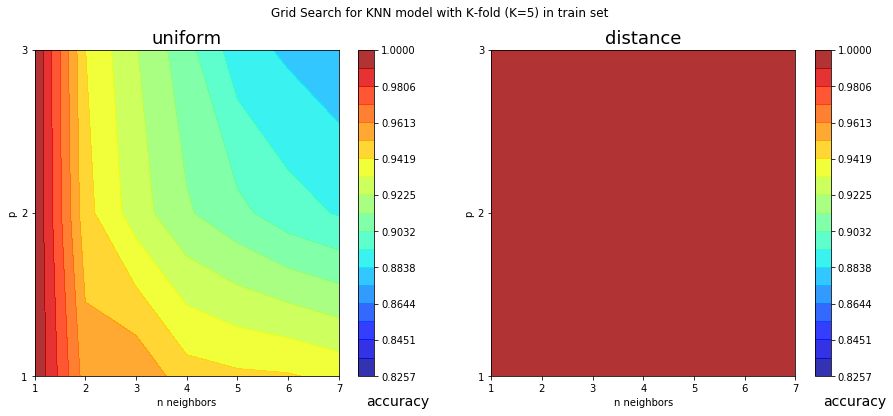

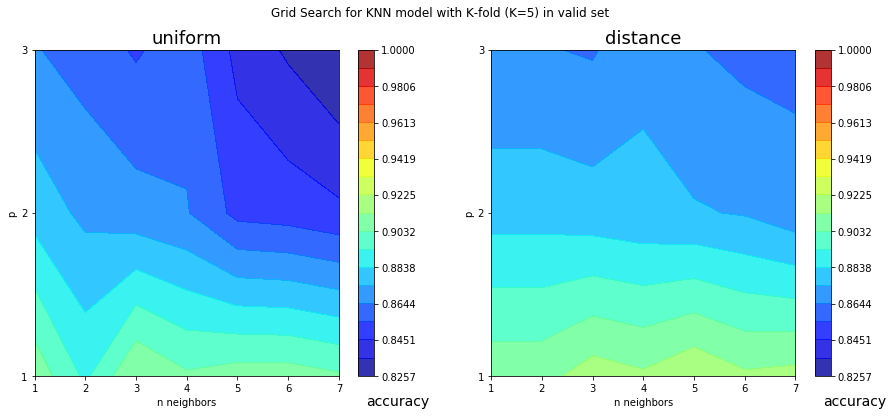

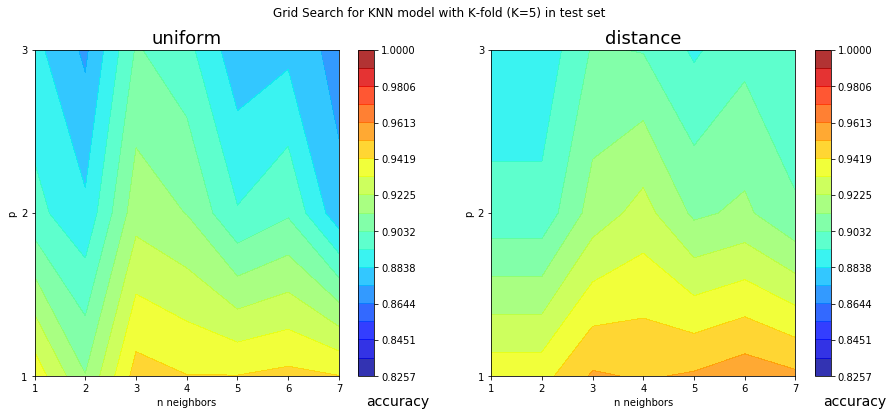

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## custom shared colorbar 
vmin = np.min(summary.iloc[:, 3:].values)
vmax = np.max(summary.iloc[:, 3:].values)
levels = np.linspace(vmin, vmax, 19)

for dataset in ['train', 'valid', 'test']:
    
    acc_uniform = summary.loc[:20, f'acc_{dataset}_avg'].values
    acc_distance = summary.loc[21:, f'acc_{dataset}_avg'].values
    
    acc_uniform = acc_uniform.reshape(len(n_neighbors_list), len(p_list)).T
    acc_distance = acc_distance.reshape(len(n_neighbors_list), len(p_list)).T
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
    fig.suptitle(f"Grid Search for KNN model with K-fold (K=5) in {dataset} set")
    C1 = ax1.contourf(n_neighbors_list, p_list, acc_uniform, levels=levels, alpha=0.8, cmap='jet')
    ax1.set_xticks(n_neighbors_list)
    ax1.set_yticks(p_list)
    ax1.set_xlabel("n neighbors")
    ax1.set_ylabel("p")
    ax1.set_title("uniform", fontsize=18)
    cb1 = fig.colorbar(C1, ax=ax1, orientation='vertical', pad=0.05)
    cb1.set_label("accuracy", labelpad=-40, y=-0.1, rotation=0, fontsize=14)
    cb1.ax.yaxis.set_label_position('left')
    
    C2 = ax2.contourf(n_neighbors_list, p_list, acc_distance, levels=levels, alpha=0.8, cmap='jet')
    ax2.set_xticks(n_neighbors_list)
    ax2.set_yticks(p_list)
    ax2.set_xlabel("n neighbors")
    ax2.set_ylabel("p")
    ax2.set_title("distance", fontsize=18)
    cb2 = fig.colorbar(C2, ax=ax2, orientation='vertical', pad=0.05)
    cb2.set_label("accuracy", labelpad=-40, y=-0.1, rotation=0, fontsize=14)
    cb2.ax.yaxis.set_label_position('left')
    
    plt.savefig(f'output/grid_search_in_{dataset}_set.png', dpi=300)